In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
with open('week_data.basket') as f:
    content = f.readlines()
ruleset = []
weekrule = []
for i in range(len(content)):
    if(content[i] != "###\n"):
        if((len(content[i].split('frozenset')[3].split(',')) == 2) & (len(content[i].split('frozenset')[4].split(',')) == 4)):
            weekrule.append(content[i])
    else:
        ruleset.append(weekrule)
        weekrule = []

In [3]:
a = ruleset[0][0].split('frozenset')[3].split(',')[0]
b = ruleset[0][0].split('frozenset')[4].split(',')[0]
def count_chara(rule1,rule2):
    count = 0
    for i in range(min(len(rule1),len(rule2))):
        if(rule1[i] == rule2[i]):
            count += 1
    return count
### chose 23 to compare whether same rule

In [26]:
sort_rule = sorted(ruleset[0])
for i in range(len(sort_rule)):
    print(sort_rule[i])

({frozenset({'day_weekday_ch_pump_kw_low'}): frozenset({'day_weekday_ch_sys_eff_high'})}, frozenset({'day_weekday_ch_pump_kw_low'}), frozenset({'day_weekday_ch_sys_eff_high'}), 0.6363636363636364, 1.0, 1.03125)

({frozenset({'day_weekday_ch_pump_kw_low'}): frozenset({'day_weekday_con_pump_eff_high'})}, frozenset({'day_weekday_ch_pump_kw_low'}), frozenset({'day_weekday_con_pump_eff_high'}), 0.6363636363636364, 1.0, 1.1785714285714286)

({frozenset({'day_weekday_ch_pump_kw_low'}): frozenset({'day_weekday_con_ret_tmp_low'})}, frozenset({'day_weekday_ch_pump_kw_low'}), frozenset({'day_weekday_con_ret_tmp_low'}), 0.6363636363636364, 1.0, 1.222222222222222)

({frozenset({'day_weekday_ch_pump_kw_low'}): frozenset({'day_weekday_con_sup_tmp_low'})}, frozenset({'day_weekday_ch_pump_kw_low'}), frozenset({'day_weekday_con_sup_tmp_low'}), 0.45454545454545453, 0.7142857142857143, 1.4732142857142858)

({frozenset({'day_weekday_ch_pump_kw_low'}): frozenset({'day_weekday_tot_chi_eff_high'})}, frozenset

In [45]:
float(sort_rule[i].split('frozenset')[4].split(',')[2])

0.8285714285714286

In [37]:
# all not reduplicated rules in a week
rule_list = [] # a list for rules like [a<->b c<->d ...]
for i in range(len(sort_rule)):
    fir = sort_rule[i].split('frozenset')[3].split("'")[1].split('_')[:-1]
    first_part = ""
    for m in range(len(fir)):
        if(m == len(fir)-1): 
            first_part = first_part + fir[m]
        else:
            first_part = first_part + fir[m] + '_'
    sec = sort_rule[i].split('frozenset')[4].split(',')[0].split("'")[1].split('_')[:-1]
    second_part = ""
    for n in range(len(sec)):
        if(n == len(sec)-1):
            second_part = second_part + sec[n]
        else:
            second_part = second_part + sec[n] + '_'
    firstchoice = first_part + "<->" + second_part
    secondchoice = second_part + "<->" + first_part
    if((firstchoice not in rule_list) and (secondchoice not in rule_list)):
        rule_list.append(firstchoice)
print(rule_list)

['day_weekday_ch_pump_kw<->day_weekday_ch_sys_eff', 'day_weekday_ch_pump_kw<->day_weekday_con_pump_eff', 'day_weekday_ch_pump_kw<->day_weekday_con_ret_tmp', 'day_weekday_ch_pump_kw<->day_weekday_con_sup_tmp', 'day_weekday_ch_pump_kw<->day_weekday_tot_chi_eff', 'day_weekday_ch_sys_eff<->day_weekday_con_pump_eff', 'day_weekday_ch_sys_eff<->day_weekday_con_ret_tmp', 'day_weekday_ch_sys_eff<->day_weekday_tot_chi_eff', 'day_weekday_con_pump_eff<->day_weekday_con_ret_tmp', 'day_weekday_con_pump_eff<->day_weekday_tot_chi_eff', 'day_weekday_con_ret_tmp<->day_weekday_tot_chi_eff', 'day_weekday_con_sup_tmp<->day_weekday_stat2_wet_tmp', 'day_weekday_con_sup_tmp<->day_weekday_ch_sys_eff', 'day_weekday_con_sup_tmp<->day_weekday_con_pump_eff', 'day_weekday_con_sup_tmp<->day_weekday_con_ret_tmp', 'day_weekday_con_sup_tmp<->day_weekday_tot_chi_eff', 'day_weekday_con_sup_tmp<->day_weekday_tow_sys_eff', 'day_weekday_con_sup_tmp<->day_weekday_tow_sys_kw', 'day_weekday_stat1_air_hum<->day_weekday_ch_pump_

In [51]:
# for everyweek's rules, find rule_list[0] [1] ... calculate the average confidence
rule_confidence = []
for i in range(len(rule_list)):
    rule_confidence.append([])
for j in range(len(ruleset)):
    sort_rule = sorted(ruleset[j])
    for w in range(len(rule_list)):
        temp_conf = 0
        temp_num = 0
        for i in range(len(sort_rule)):
            fir = sort_rule[i].split('frozenset')[3].split("'")[1].split('_')[:-1]
            first_part = ""
            for m in range(len(fir)):
                if(m == len(fir)-1): 
                    first_part = first_part + fir[m]
                else:
                    first_part = first_part + fir[m] + '_'
            sec = sort_rule[i].split('frozenset')[4].split(',')[0].split("'")[1].split('_')[:-1]
            second_part = ""
            for n in range(len(sec)):
                if(n == len(sec)-1):
                    second_part = second_part + sec[n]
                else:
                    second_part = second_part + sec[n] + '_'
            firstchoice = first_part + "<->" + second_part
            secondchoice = second_part + "<->" + first_part
            if((firstchoice == rule_list[w]) or (secondchoice) == rule_list[w]): # this rule in the rule_list, add to rule conf
                temp_conf += float(sort_rule[i].split('frozenset')[4].split(',')[2])
                temp_num += 1
        if(temp_num == 0):
            rule_confidence[w].append(float(0))
        else:
            rule_confidence[w].append(temp_conf/temp_num) 
print(rule_confidence)

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 0.7368421052631579, 0.8888888888888888, 0.8421052631578947, 0.0, 0.8552631578947368, 0.8518518518518519, 0.0, 0.8666666666666667, 0.0, 0.0, 0.7846846846846847, 1.0, 0.7272727272727273, 0.0, 0.8, 0.8148148148148148, 0.0, 0.8, 0.0, 0.0, 0.8484162895927603, 0.8118181818181818, 0.0, 1.0, 0.8, 0.8823529411764706, 0.0, 0.0, 0.9030206677265501, 0.0, 0.9441964285714286, 0.92, 0.7727272727272727, 0.8697478991596639, 0.7922077922077921, 1.0, 0.0, 0.7692307692307693, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.875, 0.0, 0.0, 0.875, 1.0, 0.8417874396135265, 0.7894736842105263, 0.8008898776418243, 0.0, 0.8140756302521008, 0.9050925925925926, 0.0, 0.7727272727272727, 0.0, 0.9486842105263158, 0.0, 0.8166666666666667, 0.8827586206896552, 0.7931034482758621, 0.0, 0.0, 0.7142857142857143, 0.0, 0.0, 0.875, 0.0, 0.0, 0.782608695652174, 0.0, 0.7391304347826086, 0.0, 0.8846153846153846, 0.9273182957393484, 0.871875, 0.9230769230769231, 0.0, 0.0, 0.77988505747126

In [63]:
confidence_set = []
for i in range(len(rule_confidence)):
    for j in range(len(rule_confidence[i])):
        confidence_set.append(rule_confidence[i][j])
print(len(rule_confidence))
print(len(rule_confidence[0]))
rules = []
weeks = []
for i in range(60): #60 rules
    for j in range(125): #125 weeks
        rules.append(rule_list[i])
for i in range(60):
    for j in range(125):
        weeks.append("week"+str(j))

60
125


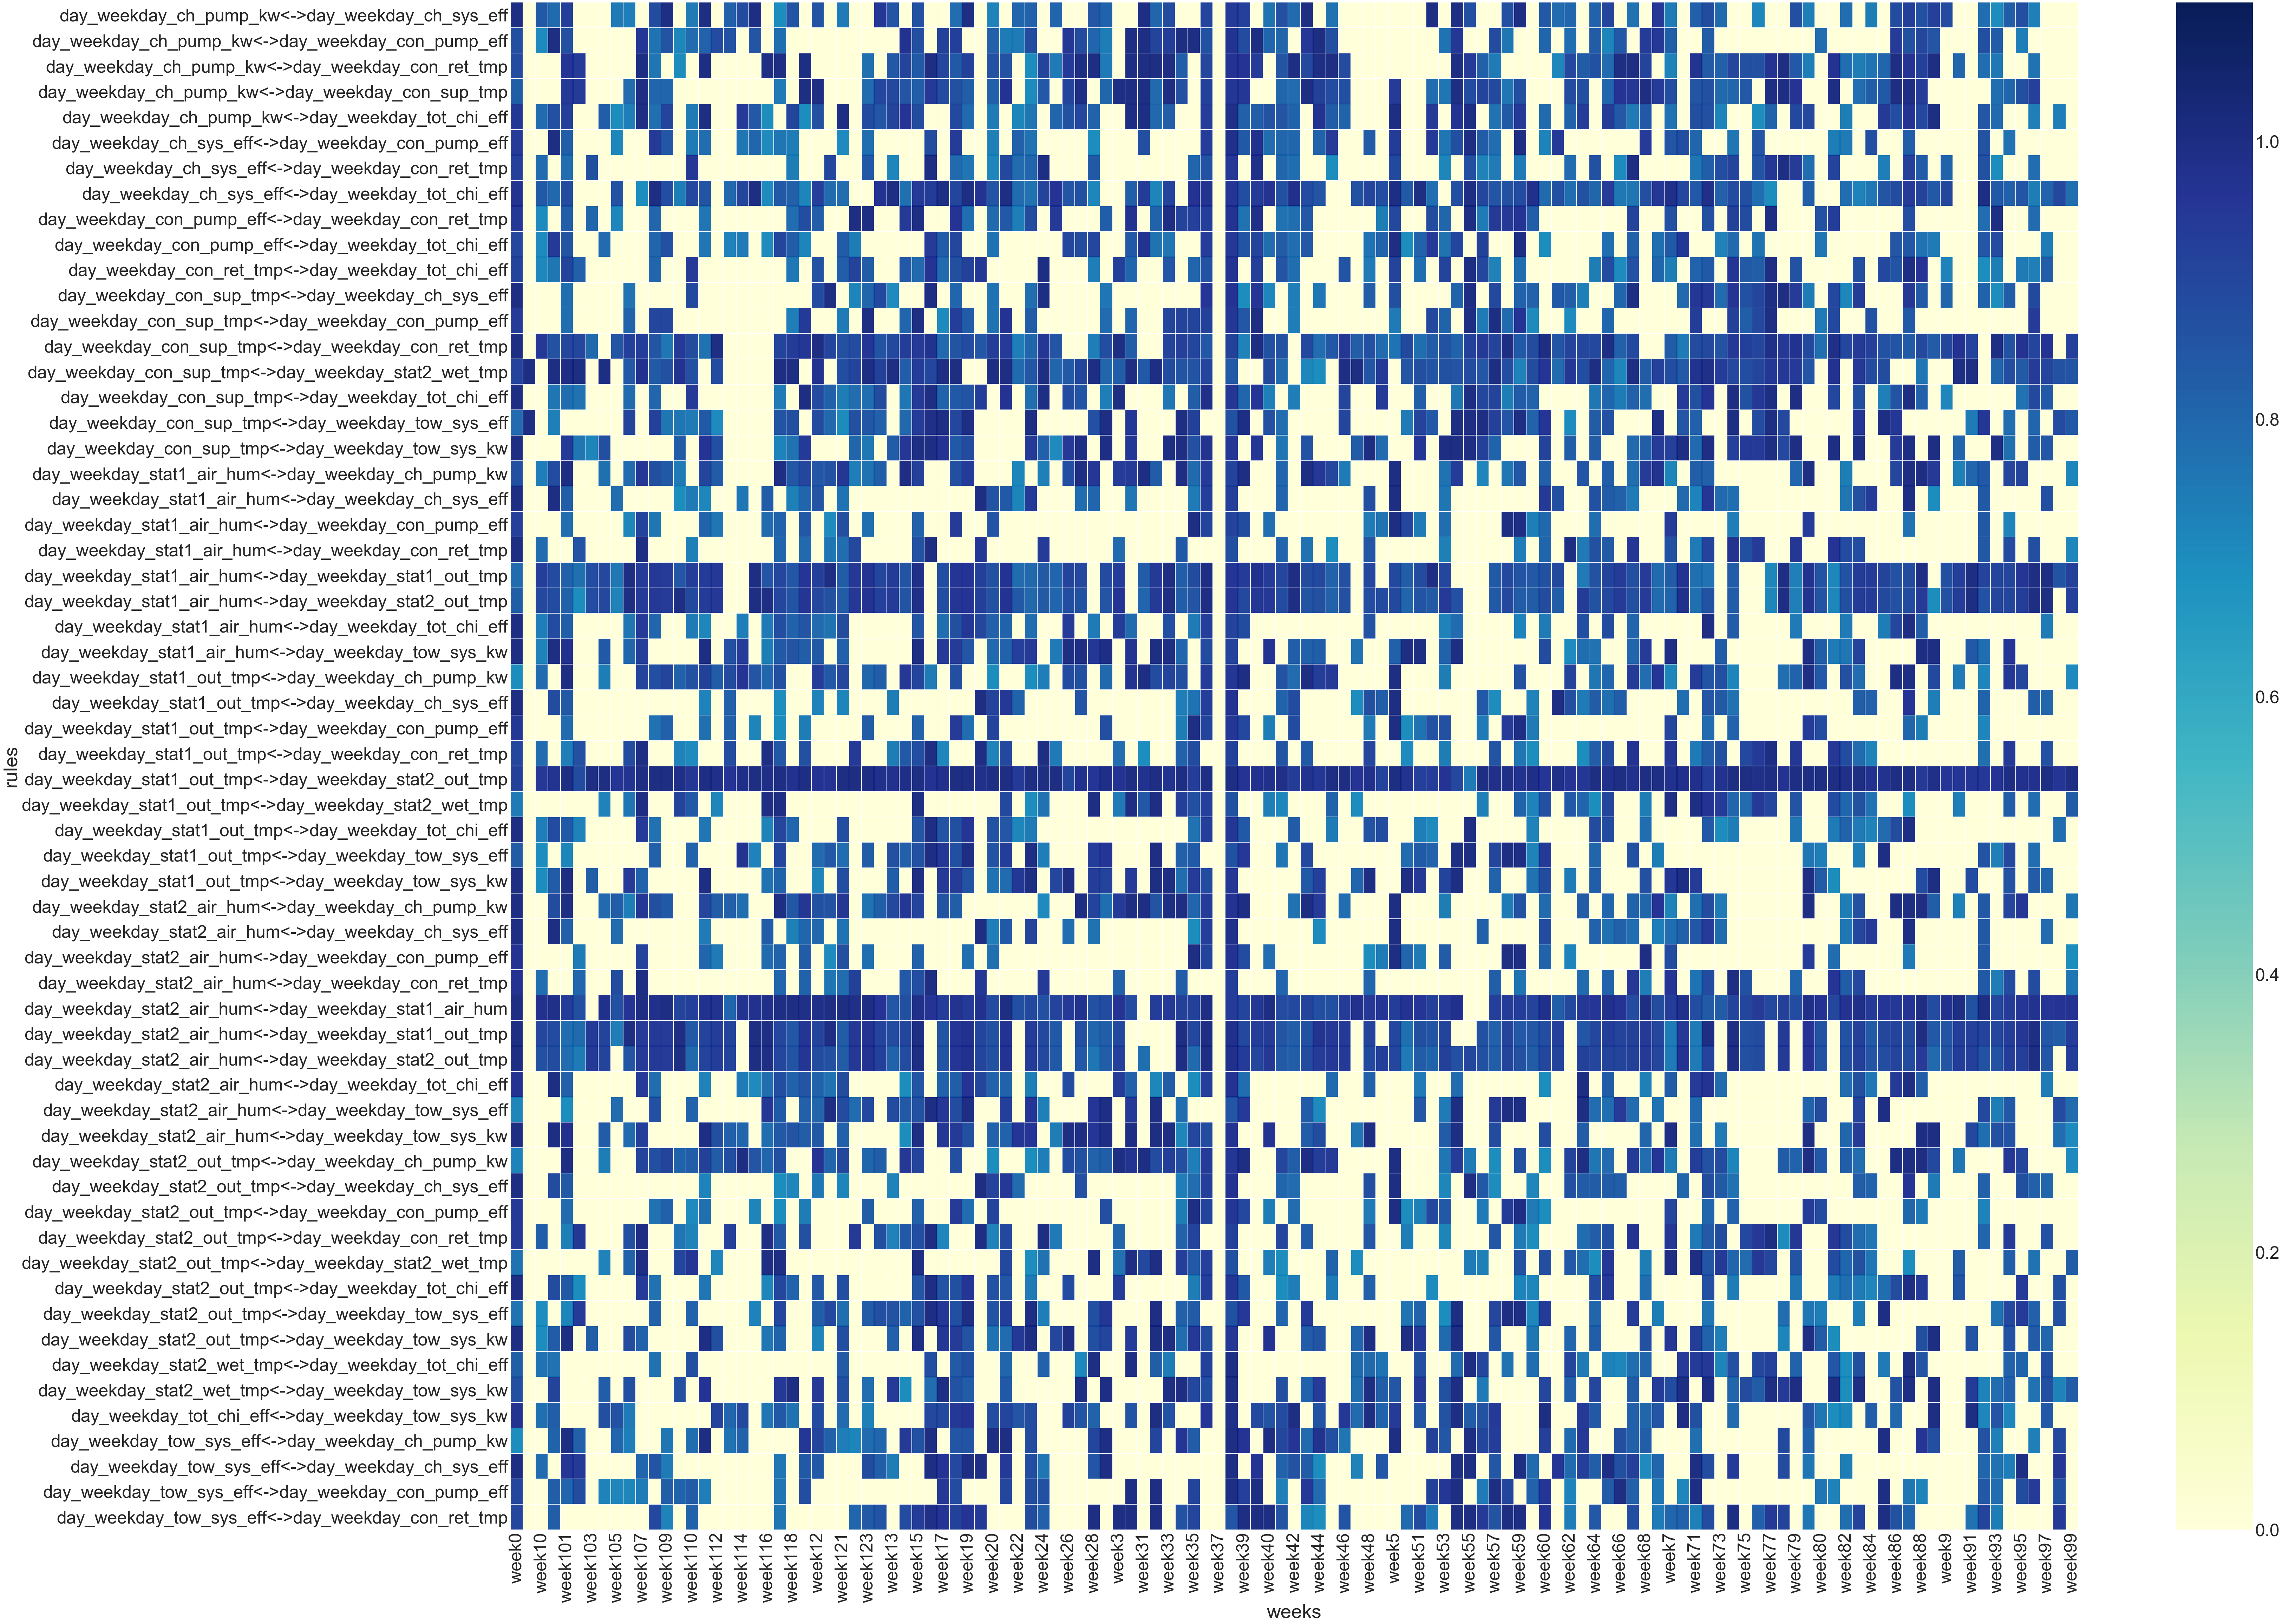

In [75]:
whole_rules_df = pd.DataFrame({'rules':rules,
                               'weeks':weeks,
                               'confidence':confidence_set})
whole_pt = whole_rules_df.pivot_table(index='rules', columns='weeks', values='confidence', aggfunc=np.sum)
f, ax = plt.subplots(figsize=(100,80))
sns.set(font_scale=5)
one_heat = sns.heatmap(whole_pt,fmt="d",cmap='YlGnBu',linewidths=.5, ax=ax,vmin=0,vmax=1.1)

In [50]:
"""
ruleset-list contains different week rules
ruleset[0]-list contains rules in first week
ruleset[0][0]-str the first rule
select rules in week 1,2 .....
"""
def rulein(rule_1,rule_2,i):
    for j in range(len(ruleset[i])):
        if((rule_1 == ruleset[i][j].split('frozenset')[1]) & (rule_2 == ruleset[i][j].split('frozenset')[2])):
            return True
    return False

In [70]:
rule_1 = ruleset[0][0].split('frozenset')[1]
rule_2 = ruleset[0][0].split('frozenset')[2]
print(rulein(rule_1,rule_2,0))

True


In [74]:
### find whether the rule in first week appears in the other weeks
"""
for j in range(len(ruleset[0])):
    rule_1 = ruleset[0][j].split('frozenset')[1]
    rule_2 = ruleset[0][j].split('frozenset')[2]
    for i in range(len(ruleset)):
        if(rulein(rule_1,rule_2,i)):
            print("rule:" + str(j) + "in week " + str(i))
"""

'\nfor j in range(len(ruleset[0])):\n    rule_1 = ruleset[0][j].split(\'frozenset\')[1]\n    rule_2 = ruleset[0][j].split(\'frozenset\')[2]\n    for i in range(len(ruleset)):\n        if(rulein(rule_1,rule_2,i)):\n            print("rule:" + str(j) + "in week " + str(i))\n'